In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv')

In [4]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### 컬럼 설명 
- TOWN : 지역 이름 
- LON, LAT : 위도, 경도 정보 
- **CMDEV : 해당 지역의 집값(중간값)** 
- CRIM : 근방 범죄율 
- ZN : 주택지 비율 
- INDUS : 사업적 비즈니스에 활용되지 않는 농지 면적 
- CHAS : 경계선에 강에 있는지 여부  
- NOX : 산화 실소 농도 
- RM : 자택당 평균 방 갯수
- AGE : 1940년 이전에 건설된 비율
- DIS : 5개의 보스터 고용 센터와의 거리에 따른 가중치 부여 
- RAD : radial 고속도로와의 접근성 지수 
- TAX : 10,000달러 당 재산세
- PTRATIO : 지역별 학생-교사 비율 
- B : 지역의 흑인 지수 (1000(B - 0.63)^2) B는 흑인의 비율  
- LSTAT : 빈곤층의 비율  

### EDA 

#### 데이터셋 기본 정보 탐색 

In [7]:
df.shape

(506, 17)

In [6]:
df.isnull()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

In [9]:
df['CMEDV'].min()

5.0

In [10]:
df['CMEDV'].max()

50.0

In [11]:
# 신뢰구간의 최소값 
# Q1 - 1.5 * IQR // Q3 - Q1 
IQR = df['CMEDV'].describe()[6] - df['CMEDV'].describe()[4]
IQR 

7.975000000000001

In [13]:
df['CMEDV'].describe()[4] - 1.5 * IQR 

9.431250000000004

In [15]:
# 신뢰구간의 최대값
# Q3 + 1.5 * IQR 
df['CMEDV'].describe()[4] + 1.5 * IQR

24.61874999999999

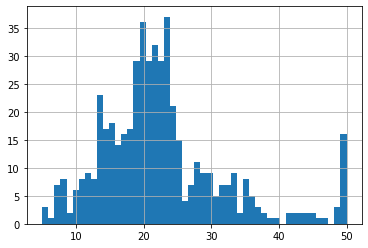

In [16]:
df['CMEDV'].hist(bins=50)

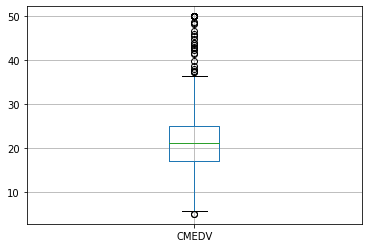

In [18]:
df.boxplot(column=['CMEDV'])

In [19]:
df.columns

Index(['TOWN', 'LON', 'LAT', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

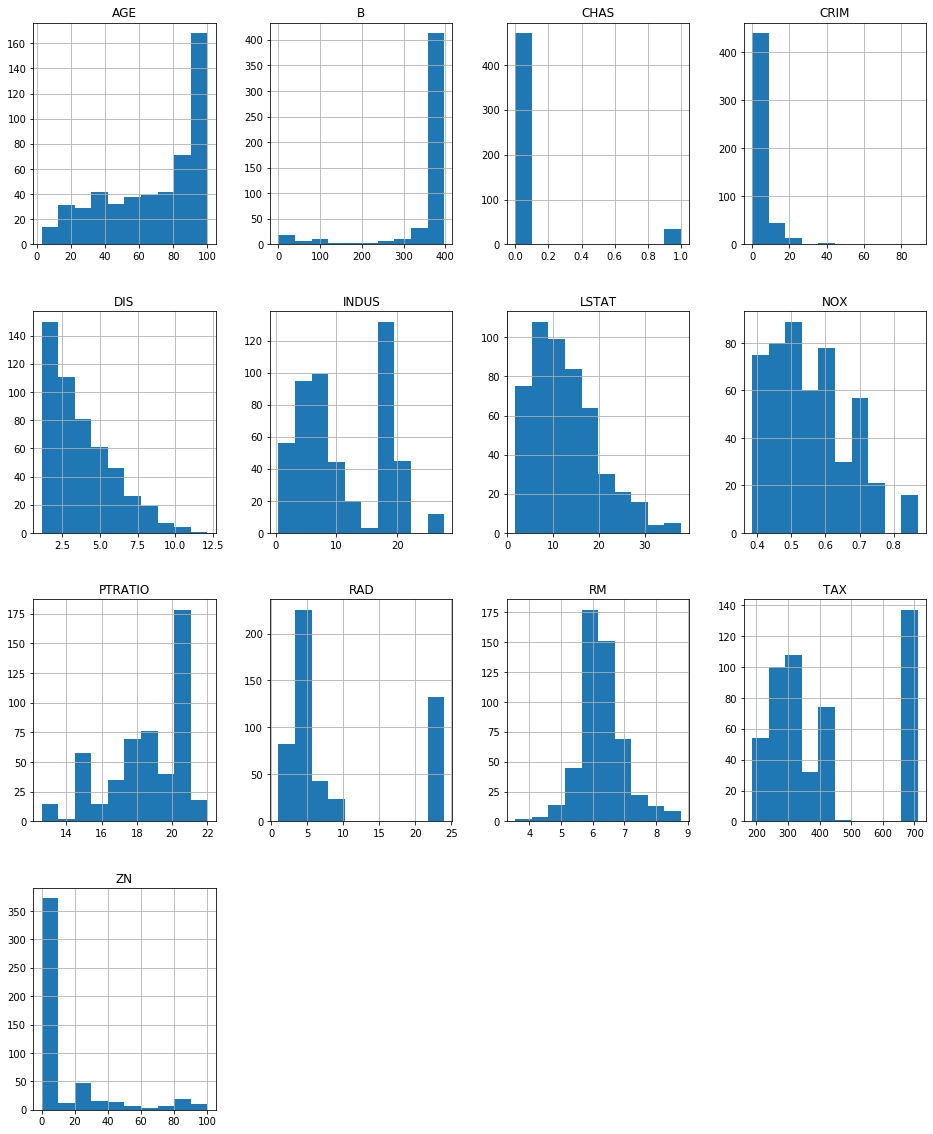

In [21]:
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig = plt.figure(figsize=(16,20))
ax = fig.gca()
df[numerical_columns].hist(ax=ax)
plt.show()

In [22]:
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
corr = df[cols].corr(method='pearson')

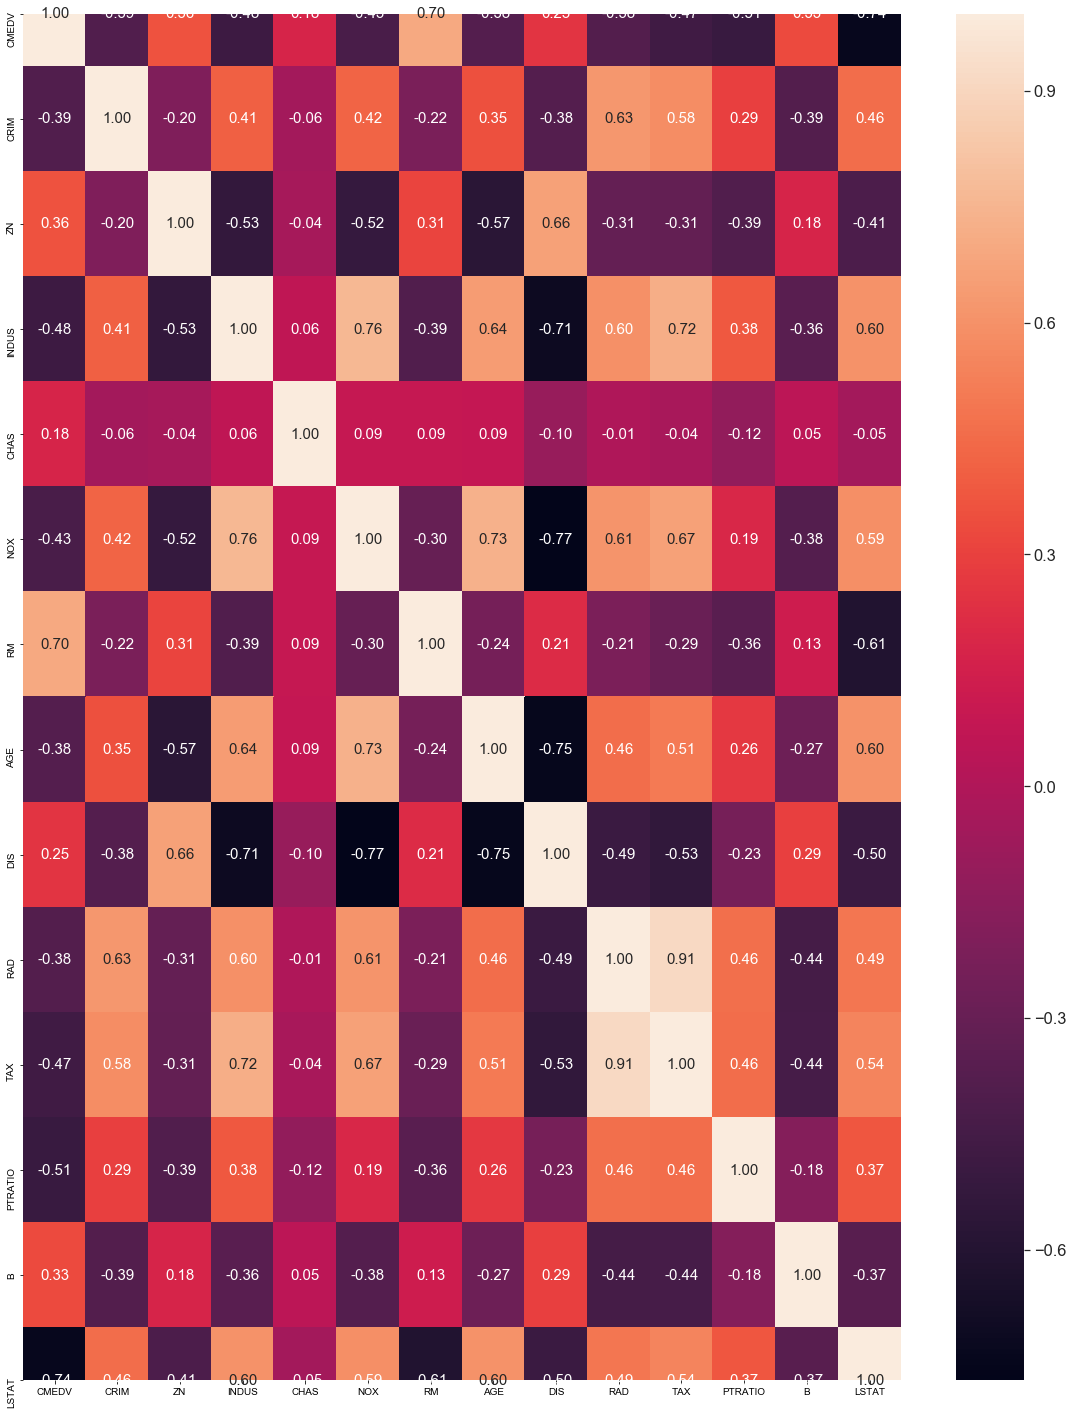

In [25]:
fig = plt.figure(figsize=(16,20))
ax = fig.gca()
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols, ax=ax )
plt.tight_layout()
plt.show()

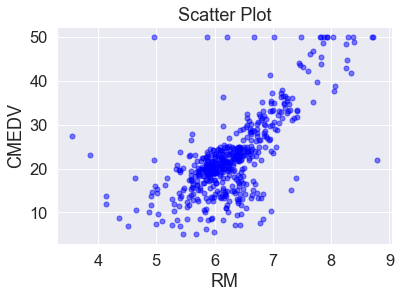

In [27]:
plt.plot('RM', 'CMEDV', data=df, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()

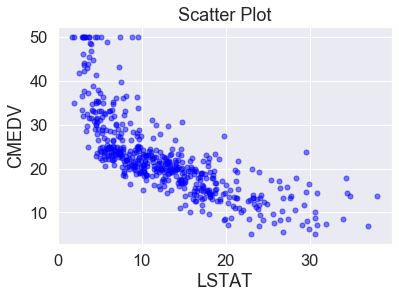

In [28]:
plt.plot('LSTAT', 'CMEDV', data=df, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('LSTAT')
plt.ylabel('CMEDV')
plt.show()

In [29]:
df['TOWN'].value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Hanover               1
Dover                 1
Topsfield             1
Wenham                1
Sherborn              1
Name: TOWN, Length: 92, dtype: int64

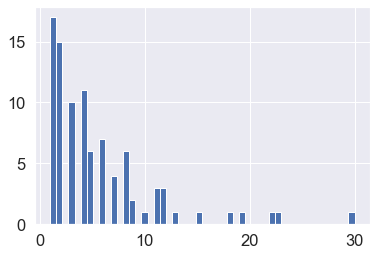

In [30]:
df['TOWN'].value_counts().hist(bins=50)

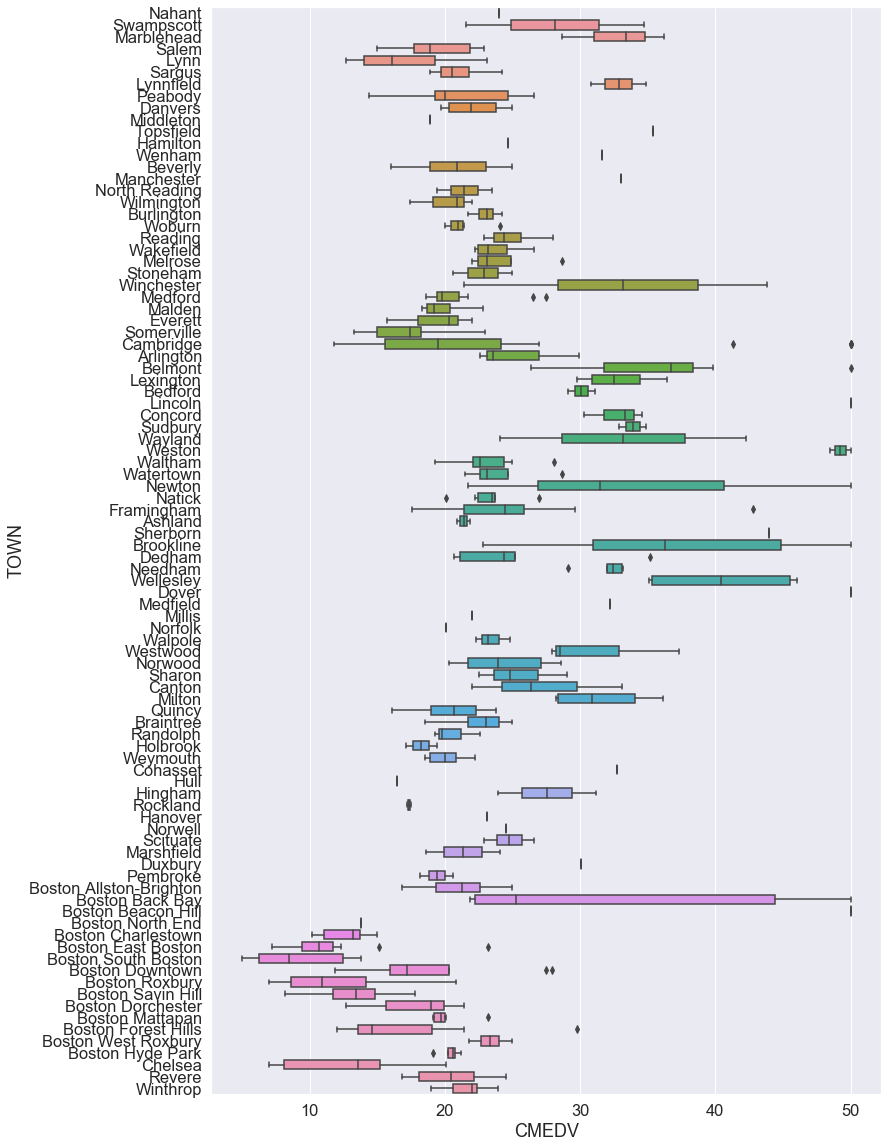

In [32]:
fig=plt.figure(figsize=(12,20))
ax = fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)

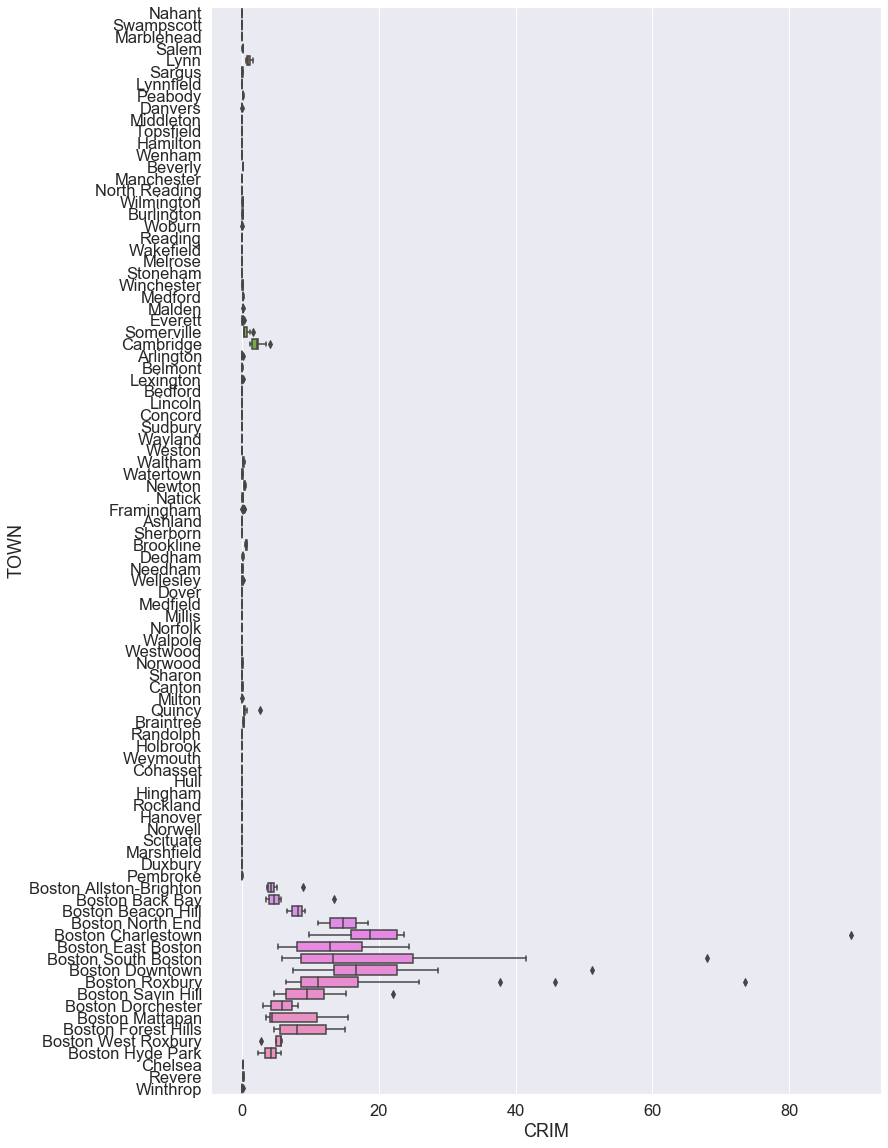

In [34]:
fig=plt.figure(figsize=(12,20))
ax = fig.gca()
sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

In [37]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [46]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from math import sqrt 

X = df[scaler_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [47]:
Ir = linear_model.LinearRegression()
model = Ir.fit(X_train, y_train)


print(Ir.coef_)

[-0.95549078  1.18690662  0.22303997  0.76659756 -1.78400866  2.83991455
 -0.05556583 -3.28406695  2.84479571 -2.33740727 -1.77815381  0.79772973
 -4.17382086]


In [48]:
plt.rcParams['figure.figsize'] = [12,16]
coefs = Ir.coef_.tolist()
coefs_series = pd.Series(coefs)

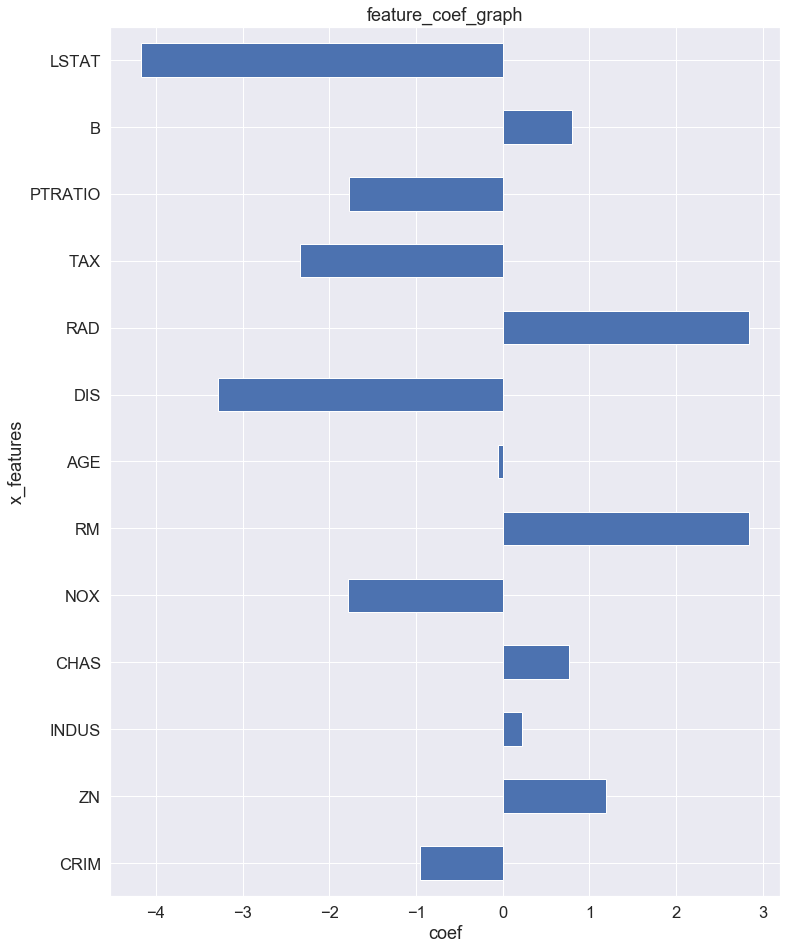

In [50]:
x_labels = scaler_columns 
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

In [51]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7490284664199387
0.700934213532155


In [55]:
# rmse 
y_predictions = Ir.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

4.672162734008589


In [54]:
y_predictions = Ir.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

4.614951784913311


In [57]:
import statsmodels.api as sm

In [58]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.54
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          2.61e-108
Time:                        10:45:34   Log-Likelihood:                -1196.1
No. Observations:                 404   AIC:                             2420.
Df Residuals:                     390   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4800      0.238     94.635      0.000      22.013      22.947
CRIM          -0.9555      0.299     -3.192      0.002      -1.544      -0.367
ZN             1.1869      0.353      3.362      0.001       0.493       1.881
INDUS          0.2230      0.470      0.475      0.635      -0.700       1.147
CHAS           0.7666      0.238      3.227      0.001       0.300       1.234
NOX           -1.7840      0.512     -3.482      0.001      -2.791      -0.777
RM             2.8399      0.326      8.723      0.000       2.200       3.480
AGE           -0.0556      0.410     -0.135      0.892      -0.862       0.751
DIS           -3.2841      0.491     -6.695      0.000      -4.248      -2.320
RAD            2.8448      0.650      4.375      0.000       1.566       4.123
TAX           -2.3374      0.717     -3.259      0.001      -3.748      -0.927
PTRATIO       -1.7782      0.312     -5.700      0.000      -2.391      -1.165
B              0.7977      0.293      2.725      0.007       0.222       1.373
LSTAT         -4.1738      0.405    -10.317      0.000      -4.969      -3.378
==============================================================================
Omnibus:                      167.528   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.057
Skew:                           1.774   Prob(JB):                    1.00e-167
Kurtosis:                       8.753   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# 다중 공선성 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()

vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns 
vif.round(1)

,VIF Factor,features
0,1.0,const
1,1.7,CRIM
2,2.2,ZN
3,3.9,INDUS
4,1.1,CHAS
5,4.4,NOX
6,1.9,RM
7,3.1,AGE
8,4.1,DIS
9,6.9,RAD
